# NSW Road Crash Data

Imports, jupyter magic & general setup

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
from datetime import datetime

In [33]:
# tell jupyter to put "Graphs n Things ©" inline in the notebook
%matplotlib inline

In [34]:
# set the size of the plots
plt.rcParams["figure.figsize"] = (10, 5)

In [35]:
# give us a style state to go back to
saved_style_state = matplotlib.rcParams.copy()

Loading the datafile

In [36]:
CWD = os.getcwd()

if os.path.isfile(f"{CWD}/DATA/NSW_Road_Crash_Data_2016-2020.csv"):
    filepath = f"{CWD}/DATA/NSW_Road_Crash_Data_2016-2020.csv"
    print("loading from file")
else:
    print("file not found")

    
crashData = pd.read_csv(filepath)
print("done")

loading from file
done


Lets start getting to know the dataset a little.

In [37]:
cols = list(crashData.columns)

print(f"the dataframe has a total of {len(cols)} colums:")

the dataframe has a total of 50 colums:


## Column names, datatypes & (some) possible values

Column | Data Type | Options
----- | ----- | ----
Crash ID | int |
Degree of crash | text desc | Injury, Non-casualty (towaway), Fatal 
Degree of crash - detailed | text desc | 'Fatal' 'Non-casualty (towaway)' 'Minor/Other Injury' 'Moderate Injury' 'Serious Injury'
Reporting year | date
Year of crash | date
Month of crash | date
Day of week of crash | date
Time of crash - Two-hour intervals | time
Street of crash | text desc
Street type | text desc
Distance (from identifying feature) | int
Direction (from identifying feature) | text desc
Identifying feature | text desc
Identifying feature type | text desc
Town | text desc
Route no. | int
School zone location | boolean | 'No' 'Yes' 'Unknown'
School zone active | text desc | 'Not a school zone' 'No' 'Unknown' 'Yes'
Type of location | text desc | '2-way undivided' 'T-junction' 'X-intersection' 'Divided road' 'Roundabout' 'Dual freeway' 'Multiple intersection' '1-way street' 'Other' 'Single limited access' 'L-junction' 'Y-junction' 'Unknown'
Latitude | int
Longitude | int
LGA | text desc
Urbanisation | text desc | 'Country non-urban' 'Sydney metro. area' 'Newcastle met. area'
 'Country urban' 'Wollongong met. area' 'Country unknown'
Conurbation 1 | text desc | 'Rest of NSW - Rural' 'Syd-Newc-Woll Gtr conurbation'
 'Rest of NSW - Urban' 'Rest of NSW - Unknown'
Alignment | text desc | 'Straight' 'Curved' 'Unknown'
Primary permanent feature | text desc
Primary temporary feature | text desc
Primary hazardous feature | text desc
Street lighting | boolean | 'Nil' 'Unknown / not stated' 'Off' 'On'
Road surface | boolean | 'Unsealed' 'Sealed' 'Unknown'
Surface condition | boolean | 'Dry' 'Wet' 'Unknown' 'Snow or ice'
Weather | text desc | 'Fine' 'Raining' 'Overcast' 'Fog or mist' 'Unknown' 'Other' 'Snowing'
Natural lighting | text desc | 'Darkness' 'Daylight' 'Dusk' 'Dawn' 'Unknown'
Signals operation | text desc | 'Nil' 'On' 'Unknown / not stated' 'Off'
Other traffic control | text desc | 'No traffic controls' 'Give way sign' 'No left turn' 'Ped crossing' 'Stop sign' 'Other traf. control' 'No right turn' 'Left turn only' 'No U turn' 'Rail X no sign' 'Left turn on red' 'Road/rail worker' 'No entry/wrong way' 'Unknown' 'Rail X flashing sigs' 'Police' 'Rail X stop sign'
Speed limit | int
Road classification (admin) | text desc | 'Local' 'State' 'Regional'
RUM - code | int
RUM - description | text desc
DCA - code | int
DCA - description | text desc
DCA supplement | text desc
First impact type | text desc | 'Vehicle - Object' 'Other angle' 'Rear end' 'Head-on' 'Right angle' 'Rollover' 'Vehicle - Animal' 'Unknown' 'Vehicle - Pedestrian' 'Person - Object' 'Vehicle - Train'
Key TU type | text desc
Other TU type | text desc
No. of traffic units involved | int
No. killed | int
No. seriously injured | int
No. moderately injured | int
No. minor-other injured | int

In [57]:
crashData.drop(columns=["Crash ID", "Reporting year", "Year of crash", "Distance (from identifying feature)", "Route no.", "RUM - code", "DCA - code"], axis=1).describe()

,Latitude,Longitude,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
count,110031.000000,110031.000000,110031.000000,110031.000000,110031.000000,110031.000000,110031.000000
mean,-33.435306,150.891917,1.886750,0.015932,0.233007,0.358099,0.270060
std,1.409642,1.332618,0.721174,0.135329,0.483596,0.594104,0.557159
min,-37.388425,141.055159,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-33.932575,150.845618,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-33.827704,151.051730,2.000000,0.000000,0.000000,0.000000,0.000000
75%,-33.415146,151.228934,2.000000,0.000000,0.000000,1.000000,0.000000
max,-28.161478,159.081742,21.000000,5.000000,8.000000,38.000000,48.000000


In [ ]:
# Used to get all of the unique values in a column
cols_i_want = ['Degree of crash', 'Degree of crash - detailed', 'Reporting year', 'Year of crash', 'Month of crash', 'Day of week of crash', 'Time of crash - Two-hour intervals', 'School zone location', 'School zone active', 'Type of location', 'Urbanisation', 'Conurbation 1', 'Alignment', 'Street lighting', 'Road surface', 'Surface condition', 'Weather', 'Natural lighting', 'Signals operation', 'Other traffic control', 'Speed limit', 'Road classification (admin)', 'DCA - code', 'DCA - description', 'DCA supplement', 'First impact type', 'Key TU type', 'Other TU type', 'No. of traffic units involved', 'No. killed', 'No. seriously injured', 'No. moderately injured', 'No. minor-other injured']

for i in range(len(cols_i_want)):
    print(f"{cols_i_want[i]}")
    print(crashData[f"{cols_i_want[i]}"].unique())

In [63]:
crashData.sample(3)

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Time of crash - Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
83452,1211318,Injury,Minor/Other Injury,2019,2019,August,Sunday,10:00 - 11:59,BAYARD,ST,...,Adj - Cross traffic,NaN,Right angle,4 wheel drive,4 wheel drive,2,0,0,0,1
89900,1221575,Injury,Moderate Injury,2019,2019,December,Friday,08:00 - 09:59,PACIFIC,HWY,...,Ped - Far side,NaN,Vehicle - Pedestrian,4 wheel drive,Pedestrian,2,0,0,1,0
33148,1137440,Injury,Moderate Injury,2017,2017,May,Wednesday,16:00 - 17:59,JEFFRIES,ST,...,Opp - Right-thru,NaN,Other angle,Light truck,Light truck,2,0,0,1,0


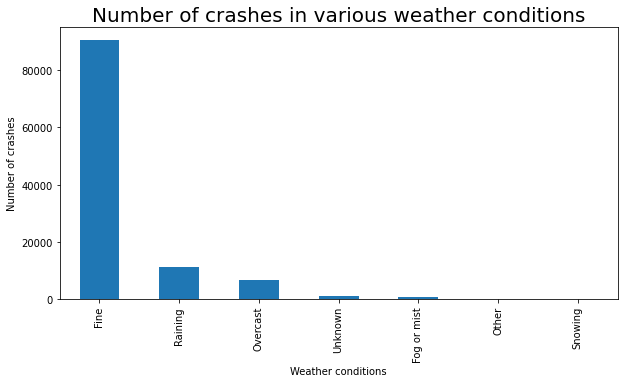

In [78]:
crashData["Weather"].value_counts().plot(kind="bar")

plt.title("Number of crashes in various weather conditions", fontsize=20)
plt.xlabel("Weather conditions")
plt.ylabel("Number of crashes")
plt.grid(False)

<AxesSubplot:>

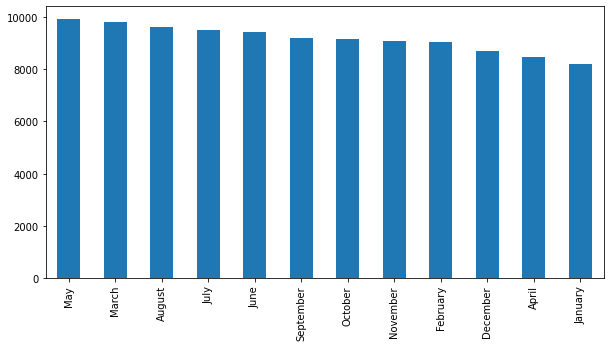

In [79]:
crashData["Month of crash"].value_counts().plot(kind="bar")

<AxesSubplot:>

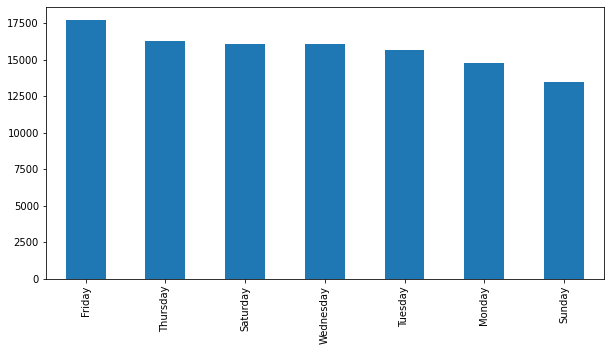

In [80]:
crashData["Day of week of crash"].value_counts().plot(kind="bar")

<AxesSubplot:>

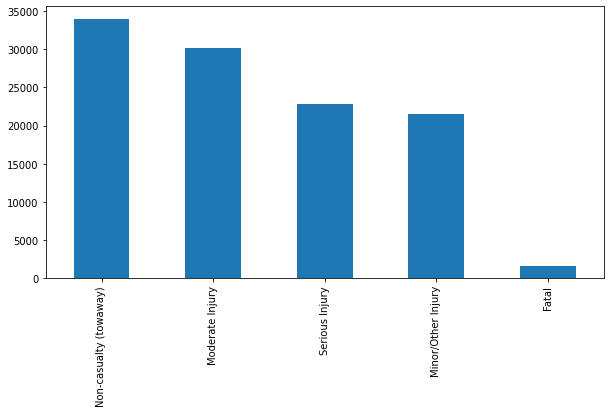

In [82]:
crashData["Degree of crash - detailed"].value_counts().plot(kind="bar")

<AxesSubplot:>

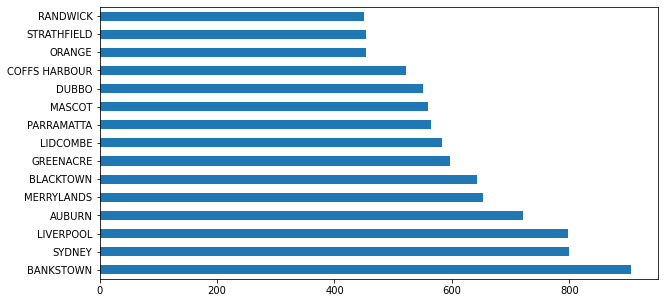

In [102]:
cdvc = crashData["Town"].value_counts()

cdvc[cdvc > 450].plot(kind="barh")

<AxesSubplot:>

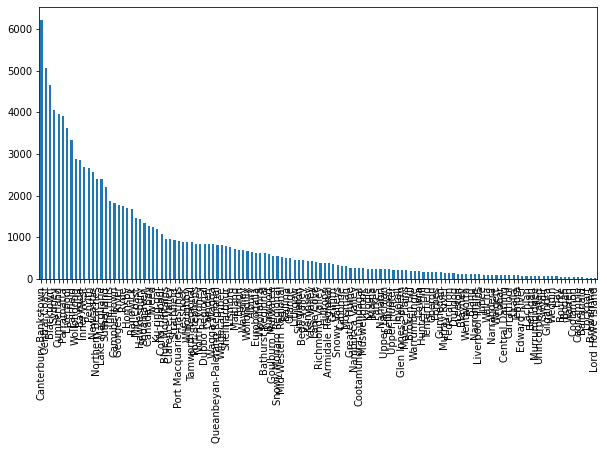

In [89]:
crashData["LGA"].value_counts().plot(kind="bar")